#Restricted Boltzmann Machines

In [ ]:
%tensorflow_version 2.x

##Learning data representations with RBMs

In [ ]:
from sklearn.neural_network import BernoulliRBM
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

rbm = BernoulliRBM(verbose=True)

rbm.n_components = 100
rbm.fit(x_train)

11493376/11490434 [==============================] - 0s 0us/step
[BernoulliRBM] Iteration 1, pseudo-likelihood = -105.59, time = 10.39s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -102.69, time = 13.24s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -101.12, time = 33.75s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -101.09, time = 32.61s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -98.59, time = 14.28s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -98.21, time = 14.20s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -98.50, time = 19.45s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -97.30, time = 25.04s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -96.88, time = 11.12s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -99.02, time = 11.09s


BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10,
             random_state=None, verbose=True)

In [ ]:
r = rbm.transform(x_test)

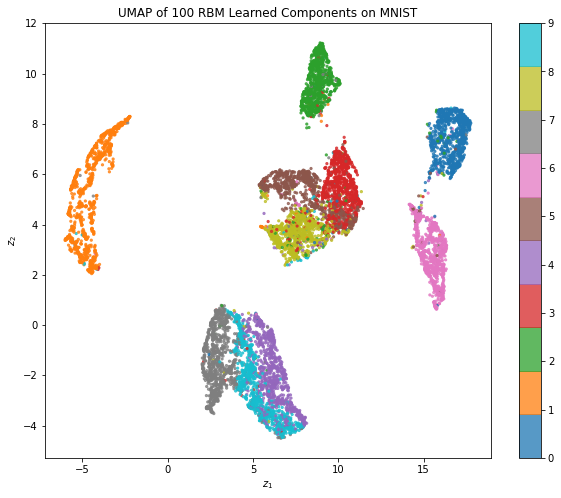

In [ ]:
import matplotlib.pyplot as plt
import umap

y_ = list(map(int, y_test))
X_ = rbm.transform(x_test)

X_ = umap.UMAP().fit_transform(X_)

plt.figure(figsize=(10,8))
plt.title('UMAP of 100 RBM Learned Components on MNIST')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.colorbar()

In [ ]:
v = rbm.components_

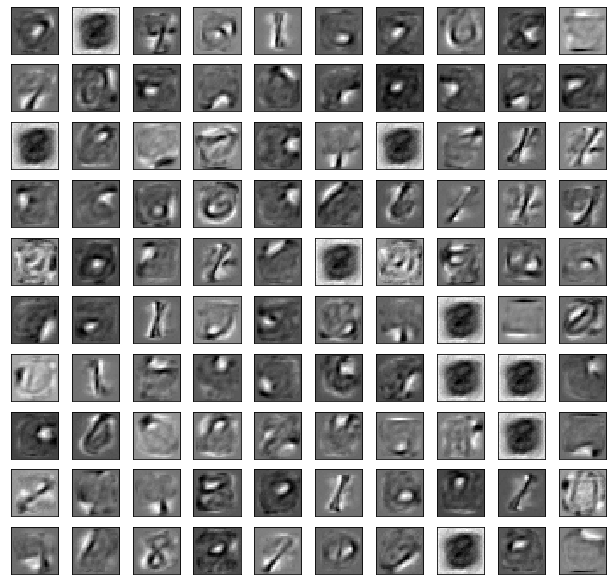

In [ ]:
plt.figure(figsize=(10, 9.5))
for i, comp in enumerate(v):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.savefig('ch.10.rbm.100.components.mnist.png', bbox_inches='tight', dpi=350)

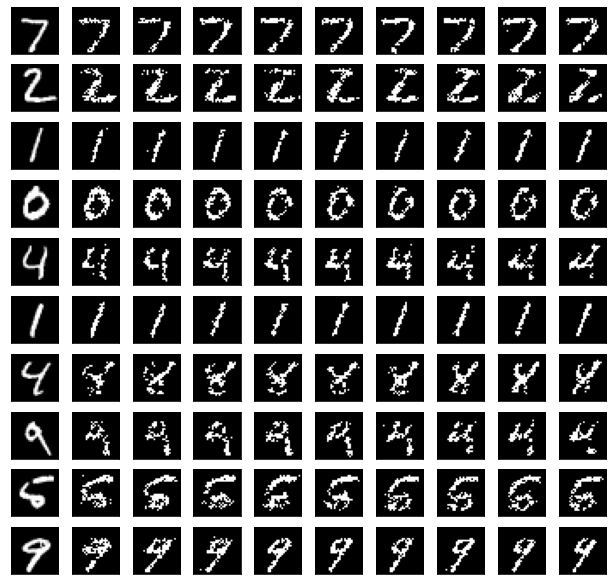

In [ ]:
plt.figure(figsize=(10, 9.5))
cnt = 1
for i in range(10):
  X_ = x_test[i]
  for j in range(10):
    plt.subplot(10, 10, cnt)
    plt.imshow(X_.reshape((28, 28)), cmap='gray')
    X_ = rbm.gibbs(X_)
    plt.xticks(())
    plt.yticks(())
    cnt += 1
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.savefig('ch.10.rbm.100.gibs.mnist.png', bbox_inches='tight', dpi=350)

##Comparing RBMs and AEs

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inpt_dim = 28*28    # 784 dimensions
ltnt_dim = 100      # 100 components

inpt_vec = Input(shape=(inpt_dim,))
encoder = Dense(ltnt_dim, activation='sigmoid') (inpt_vec)
latent_ncdr = Model(inpt_vec, encoder)
decoder = Dense(inpt_dim, activation='sigmoid') (encoder)
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(x_train, x_train, epochs=200, batch_size=1000)

Epoch 1/200
60/60 [==============================] - 0s 6ms/step - loss: 0.3782
Epoch 2/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2681
Epoch 3/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2626
Epoch 4/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2550
Epoch 5/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2436
Epoch 6/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2311
Epoch 7/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2196
Epoch 8/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2094
Epoch 9/200
60/60 [==============================] - 0s 6ms/step - loss: 0.2008
Epoch 10/200
60/60 [==============================] - 0s 6ms/step - loss: 0.1937
Epoch 11/200
60/60 [==============================] - 0s 6ms/step - loss: 0.1875
Epoch 12/200
60/60 [==============================] - 0s 6ms/step - loss: 0.1819
Epoch 13/200
60/60 [=================

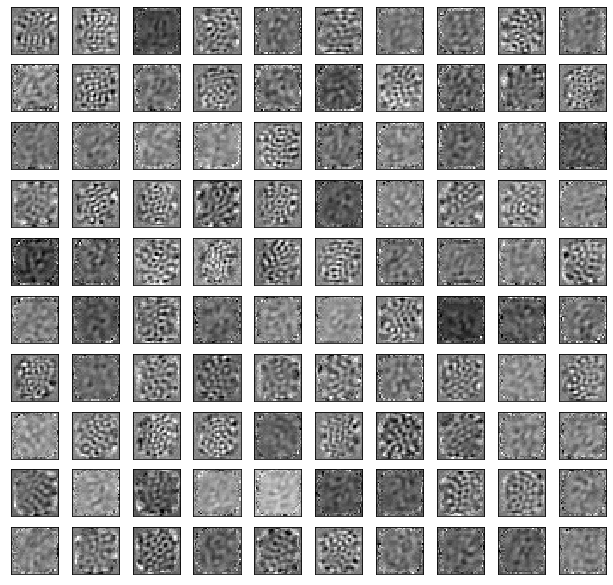

In [ ]:
plt.figure(figsize=(10, 9.5))
for i, comp in enumerate(latent_ncdr.get_weights()[0].T):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.savefig('ch.10.ae.100.components.mnist.png', bbox_inches='tight', dpi=350)


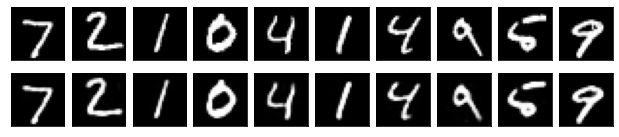

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
  plt.xticks(())
  plt.yticks(())
  
X_ = autoencoder.predict(x_test[:10])
for i in range(10):
  plt.subplot(2, 10, i+11)
  plt.imshow(X_[i].reshape((28, 28)), cmap='gray')
  plt.xticks(())
  plt.yticks(())
  
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.savefig('ch.10.ae.100.recons.mnist.png', bbox_inches='tight', dpi=350)